# <font color=red>Presented By Aditya Sikhwal</font>

### Oasis Infobyte Internship
### Task 05 - Sales Prediction using Python

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sea

### Exploring the Data

In [2]:
data=pd.read_csv(r"D:\Oasis Infobyte\Advertising.csv",index_col=0)
print("DATA LOADED SUCCESSFULLY ...")

DATA LOADED SUCCESSFULLY ...


In [3]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
data.shape

(200, 4)

In [5]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
print("Random Rows of given dataset: \n")
data.sample(5)

Random Rows of given dataset: 



,TV,Radio,Newspaper,Sales
54,182.6,46.2,58.7,21.2
82,239.8,4.1,36.9,12.3
74,129.4,5.7,31.3,11.0
84,68.4,44.5,35.6,13.6
56,198.9,49.4,60.0,23.7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
print("Statistics\n")
data.describe()

Statistics



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
dc  = data.corr()
print("Correlation:\n")
dc

Correlation:



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Visualizing and inspecting the data

[Text(0.5, 1.0, 'Heatmap of Correlated values')]

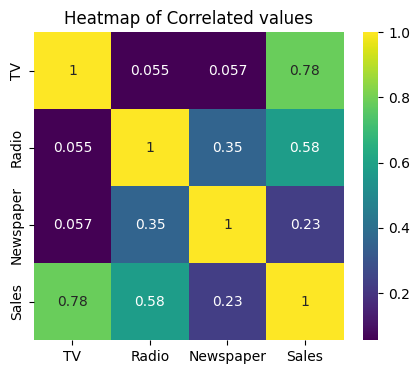

In [10]:
fig, ax = plt.subplots(figsize = (5,4))

sea.heatmap(dc, annot=True, cmap="viridis").set(title='Heatmap of Correlated values')

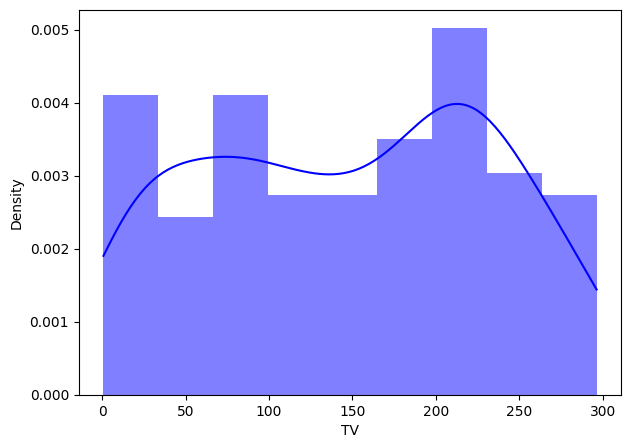

In [11]:
plt.figure(figsize=(7,5))
sea.histplot(data['TV'],color="blue",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

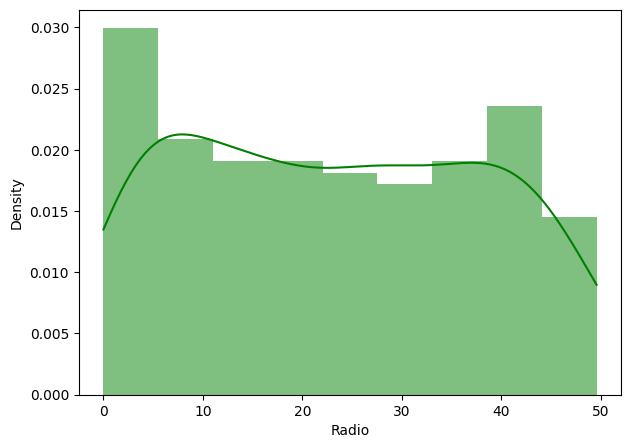

In [12]:
plt.figure(figsize=(7,5))
sea.histplot(data['Radio'],color="green",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

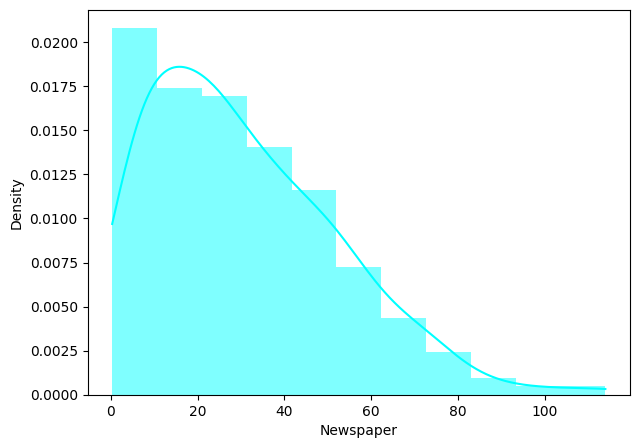

In [13]:
plt.figure(figsize=(7,5))
sea.histplot(data['Newspaper'],color="cyan",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

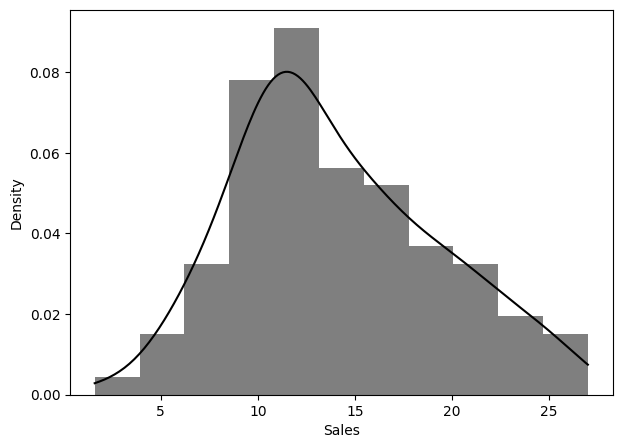

In [14]:
plt.figure(figsize=(7,5))
sea.histplot(data['Sales'],color="black",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

### Preparing the data for training

In [15]:
x= np.array(data.drop(labels=['Sales'], axis=1))
y=np.array(data['Sales'])

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state= 45)

In [16]:
print("shape of x_train",x_train.shape)

shape of x_train (160, 3)


In [17]:
print("shape of y_train",y_train.shape)

shape of y_train (160,)


### Training Model

In [18]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print('Model Training Complete...')

Model Training Complete...


In [19]:
print('intercept={}, slope coefficient={}'.format(reg.intercept_,reg.coef_))

intercept=2.985642042751584, slope coefficient=[ 0.04699362  0.18346139 -0.00486456]


### Evaluating the model performance

In [20]:
pred = reg.predict(x_test)
compare = pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare

,Actual_sales,predicted_sales
0,14.9,15.188873
1,8.8,10.205411
2,16.6,16.439320
3,23.8,21.808189
4,12.0,15.887521
5,9.7,8.926802
6,19.0,18.135673
7,11.8,11.365894
8,18.5,17.397555
9,8.5,8.669504


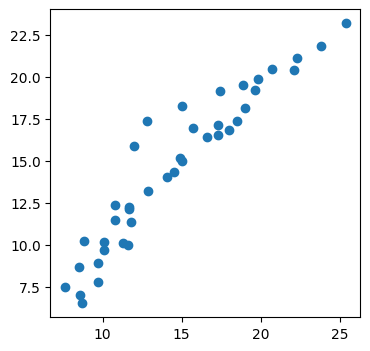

In [21]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, pred)

### Accuracy Score

In [22]:
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:', mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error: 1.0788802763848646
Mean Squared Error: 2.2564942472809375
Root Mean Squared Error: 1.5021631892976666
